# Codejam Kickstart H 2018
[codejam.kickstart](https://codejam.withgoogle.com/codejam/kickstart/)

## Problem A. Big Buttons

You are a contestant on a popular new game show and are playing for the grand prize!

There are two big buttons, a `red` one and a `black` one. 

You will make a sequence of exactly $N$ button presses.

There are lots of different sequences of presses you could make, 

but there are $P$ forbidden prefixes, each of length no greater than $N$. 

If you make a sequence of presses which begins with any of the forbidden sequences, you will not win the grand prize. 

It is fine for your sequence to contain one or more forbidden prefixes 

as long as they do not appear at the start of your sequence.

A _winning_ sequence 

- must consist of exactly $N$ button presses and 

- must not begin with one of the forbidden prefixes. 

__How many different winning sequences are there?__


_Input_

The first line of the input gives the number of test cases, $T$. 

$T$ test cases follow. 

Each test case starts with a line containing two integers $N$ and $P$, as described above. 

Then, there are $P$ more lines, each of which contains a string of between 1 and $N$ characters, inclusive, 

describing one of the forbidden sequences of presses. 

An `R` represents pressing the red button, whereas a `B` represents pressing the black button.

_Output_

For each test case, output one line containing $Case \ \#x: y$, where 

- $x$ is the test case number (starting from 1) and 

- $y$ is the number of winning sequences, as desribed above.

_Limits_

$1 ≤ T ≤ 100$.

$1 ≤ P ≤ min(2N, 100)$.

Each forbidden prefix is between 1 and $N$ characters long, inclusive.

No two forbidden prefixes will be the same.

Small dataset

$1 ≤ N ≤ 10$.

Large dataset

$1 ≤ N ≤ 50$.

## Sample

| - | Input | - | Output |
| :-: | :-: | :-: | :-: |
| T | 4 | - | - |
| N P | 3 2 | Number of Winning Sequences | `Case #1: 5` |
| Forbidden Sequences | $BBB$ | - | - |
| Forbidden Sequences | $RB$ | - | - |
| N P | 5 1 | Number of Winning Sequences | `Case #2: 16` |
| Forbidden Sequences | $R$ | - | - |
| N P | 4 3 | Number of Winning Sequences | `Case #3: 0` |
| Forbidden Sequences | $R$ | - | - |
| Forbidden Sequences | $B$ | - | - |
| Forbidden Sequences | $RBRB$ | - | - |
| N P | 50 5 | Number of Winning Sequences | `Case #4: 1125556309458944` |
| Forbidden Sequences | $BRBRBBBRBRRRBBB$ | - | - |
| Forbidden Sequences | $BRBRBRRRBRRRBRB$ | - | - |
| Forbidden Sequences | $BBBRBBBRBRRRBBB$ | - | - |
| Forbidden Sequences | $BRBRBRRRBRRRB$ | - | - |
| Forbidden Sequences | $BRBRBBBRBBBRB$ | - | - |


## Problem A. Decision

In the case of two buttons (`black` and `red`), 

the total number of different variants for a sequence of $N$ presses is equal to $2^N$.

Each forbidden beginning with the length S exclude the certain number of variant which is equal to $2^{N-S}$.

If the beginning of one of the forbidden sequences completely coincides with the other forbidden sequence, 

then we should not include this longer sequence in the calculation of banned variants 

(all these variants have already been taken into account during the counting for the shorter sequence).

For example, we have to press three times (N = 3) and the banned prefixes are {`R`, `BR`, `BRB`}.

All possible press variants:

$\begin {cases}
BBB \\ BBR \\ BRB \\ BRR \\ RBB \\ RBR \\ RRB \\RRR
\end{cases}$

We should exclude the cases `R..`, `BR.`, `BRB`:

$\begin {cases}
RBB \\ RBR \\ RRB \\ RRR \\ -- \\ BRB \\ BRR 
\end{cases}$

The number of winning sequences (`BBB`, `BBR`) is equal to

$2^3 - 2^{3-1} - 2^{3-2} = 2$.

`BR` is in the beginning of `BRB`, so `BRB` does not need in the calculation process.

In [1]:
with open('A-small-attempt1.txt', 'r') as f:
    A = [x for x in f.readlines()]
    
T, I, C = int(A[0][:-1]), 1, 1, 
X = T*[0]

while I < len(A):
    N, P = int(A[I][:-1].split(' ')[0]), int(A[I][:-1].split(' ')[1])
    S, X[C-1] = [], 2 ** N
    for J in range(I+1, P+I+1):
        S.append(list(A[J][:-1])) 
    I += P + 1
    
    K = []
    for i in range(P):
        for j in range(P):
            if (j != i) and (len(S[i]) < len(S[j])):
                t = []
                for n in range(len(S[i])):
                    t.append(S[j][n] == S[i][n])
                if sum(t) == len(S[i]):                        
                    if j not in K:
                        K.append(j)
    for k in K:
        S = S[:k] + S[k + 1:]        
        
    for j in range(len(S)):
        X[C-1] = X[C-1] - 2 ** (N - len(S[j]))

    if X[C-1] < 0: X[C-1] = 0
    C +=1
        
with open('A-small-attempt1-out.txt', 'w') as f:
    for c in range(T):  
        print('Case #{}: {} \n'.format(c+1, X[c]))
        f.write('Case #{}: {} \n'.format(c+1, X[c]))

Case #1: 5 

Case #2: 16 

Case #3: 0 

Case #4: 1125556309458944 



In [2]:
with open('A-small-attempt0.txt', 'r') as f:
    A = [x for x in f.readlines()]
    
T, I, C = int(A[0][:-1]), 1, 1, 
X = T*[0]

while I < len(A):
    N, P = int(A[I][:-1].split(' ')[0]), int(A[I][:-1].split(' ')[1])
    S, X[C-1] = [], 2 ** N
    for J in range(I+1, P+I+1):
        S.append(list(A[J][:-1])) 
    I += P + 1
    
    K = []
    for i in range(P):
        for j in range(P):
            if (j != i) and (len(S[i]) < len(S[j])):
                t = []
                for n in range(len(S[i])):
                    t.append(S[j][n] == S[i][n])
                if sum(t) == len(S[i]):                        
                    if j not in K:
                        K.append(j)
    for k in K:
        S = S[:k] + S[k + 1:]        
        
    for j in range(len(S)):
        X[C-1] = X[C-1] - 2 ** (N - len(S[j]))

    if X[C-1] < 0: X[C-1] = 0
    C +=1
        
with open('A-small-attempt0-out.txt', 'w') as f:
    for c in range(T):  
        print('Case #{}: {} \n'.format(c+1, X[c]))
        f.write('Case #{}: {} \n'.format(c+1, X[c]))

Case #1: 5 

Case #2: 16 

Case #3: 0 

Case #4: 768 

Case #5: 176 

Case #6: 0 

Case #7: 0 

Case #8: 1016 

Case #9: 896 

Case #10: 0 

Case #11: 0 

Case #12: 512 

Case #13: 0 

Case #14: 0 

Case #15: 992 

Case #16: 863 

Case #17: 1023 

Case #18: 160 

Case #19: 324 

Case #20: 968 

Case #21: 1023 

Case #22: 857 

Case #23: 0 

Case #24: 148 

Case #25: 968 

Case #26: 0 

Case #27: 1022 

Case #28: 0 

Case #29: 1023 

Case #30: 0 

Case #31: 0 

Case #32: 856 

Case #33: 0 

Case #34: 0 

Case #35: 0 

Case #36: 0 

Case #37: 0 

Case #38: 772 

Case #39: 865 

Case #40: 0 

Case #41: 1023 

Case #42: 1020 

Case #43: 0 

Case #44: 880 

Case #45: 0 

Case #46: 883 

Case #47: 992 

Case #48: 0 

Case #49: 865 

Case #50: 832 

Case #51: 1008 

Case #52: 0 

Case #53: 344 

Case #54: 0 

Case #55: 875 

Case #56: 768 

Case #57: 0 

Case #58: 384 

Case #59: 512 

Case #60: 869 

Case #61: 838 

Case #62: 1 

Case #63: 0 

Case #64: 832 

Case #65: 0 

Case #66: 0 

Case

## Problem B. Mural

Thanh wants to paint a wonderful mural on a wall that is $N$ sections long. 

Each section of the wall has a beauty score, which indicates how beautiful it will look if it is painted. 

Unfortunately, the wall is starting to crumble due to a recent flood, so he will need to work fast!

At the beginning of each day, Thanh will paint one of the sections of the wall. 

On the first day, he is free to paint any section he likes. 

On each subsequent day, he must paint a new section that is next to a section he has already painted, 

since he does not want to split up the mural.

At the end of each day, one section of the wall will be destroyed. 

It is always a section of wall that is adjacent to only one other section and is unpainted 

(Thanh is using a waterproof paint, so painted sections can't be destroyed).

The total beauty of Thanh's mural will be equal to the sum of the beauty scores of the sections he has painted. 

Thanh would like to guarantee that, no matter how the wall is destroyed, 

he can still achieve a total beauty of at least $B$. 

__What's the maximum value of B for which he can make this guarantee?__

_Input_

The first line of the input gives the number of test cases, $T$. 

$T$ test cases follow. 

Each test case starts with a line containing an integer $N$. 

Then, another line follows containing a string of $N$ digits from 0 to 9. 

The i-th digit represents the beauty score of the i-th section of the wall.

_Output_

For each test case, output one line containing $Case \ \#x: y$, where 

- $x$ is the test case number (starting from 1) and 
- $y$ is the maximum beauty score 

that Thanh can guarantee that he can achieve, as described above.

_Limits_

$1 ≤ T ≤ 100$.

Small dataset

$2 ≤ N ≤ 100$.

Large dataset

For exactly 1 case, $N = 5 × 106$; 

for the other $T - 1$ cases, $2 ≤ N ≤ 100$.

## Sample

| - | Input | - | Output |
| :-: | :-: | :-: | :-: |
| T | 4 | - | - |
| N | 4 | B | `Case #1: 6` |
| Beauty Scores | $1332$ | - | - |
| N | 4 | B | `Case #2: 14` |
| Beauty Scores | $9583$ | - | - |
| N | 3 | B | `Case #3: 7` |
| Beauty Scores | $616$ | - | - |
| N | 10 | B | `Case #4: 31` |
| Beauty Scores | $1029384756$ | - | - |

## Problem B. Decision

In [614]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

import matplotlib.pyplot as plt
%matplotlib inline

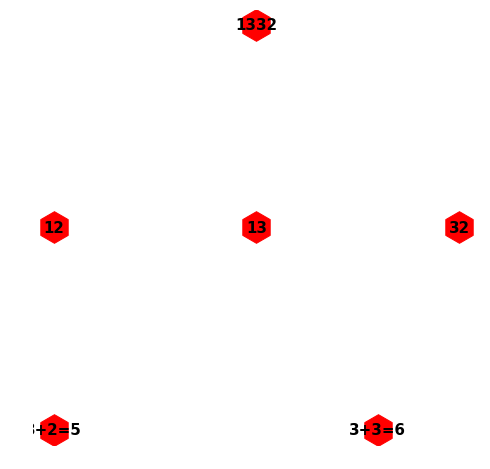

In [629]:
# Case 1
plt.figure(figsize=(8,8))
GG = nx.DiGraph()
# P - the score of painted wall, D - the score of destroyed wall

GG.add_edges_from([('1332','12'),('1332','13'),('1332','32')])
GG.add_edges_from([('12','3+2=5'),('13','3+3=6'),('32','3+3=6')])

pos = graphviz_layout(GG, prog='dot')

nx.draw_networkx_nodes(GG, pos, node_size=1000, node_shape='h')

nx.draw_networkx_labels(GG, pos, font_size=15, font_weight='bold')
plt.axis('equal'); plt.axis('off');

## Problem C. Let Me Count The Ways

To celebrate the anniversary of Googleland, $N$ couples are going to go for a boat ride in a rowboat. 

The rowboat is very long, but it is only one person wide, so the people will sit in a line from front to back.

However, during a rehearsal of the voyage, the boat did not move! 

After investigating, the organizers found that some newlywed couples were not rowing, but writing love poems for each other the whole time. 

Specifically, there are $M$ pairs of newlywed couples. 

If the two members of a newlywed couple are sitting next to each other, they will be so busy writing poems that they will not row.

Now the organizers have come to you, the smartest person in Googleland, to ask, 

__how many possible ways are there to arrange all 2N people on the rowboat,__ 

__such that for each of the M newlywed couples, the two members are not sitting next to each other?__ 

Two ways are different if there is some position in the boat at which the two ways use different people. 

Notice that for the purpose of counting the number of ways, the two members of a couple are not considered to be interchangeable. 

Since the number can be very large, 

the organizers only want to know the value of the answer modulo $1000000007(109+7)$.

_Input_

The first line of the input gives the number of test cases, $T$. 

$T$ test cases follow. 

Each test case consists of one line with two integers $N$ and $M$ as described above.

_Output_

For each test case, output one line containing $Case \ \#x: y$, where 

- $x$ is the test case number (starting from 1) and 
- $y$ is the number of possible arrangements, modulo $1000000007(109+7)$.

_Limits_

$1 ≤ T ≤ 100$.

Small dataset

$1 ≤ M ≤ N ≤ 100$.

Large dataset

$1 ≤ M ≤ N ≤ 100000$.

## Sample

| - | Input | - | Output |
| :-: | :-: | :-: | :-: |
| T | 5 | - | - |
| N M | 2 1 | Number of Possible Arrangements | `Case #1: 12` |
| N M | 2 2 | Number of Possible Arrangements | `Case #2: 8` |
| N M | 3 1 | Number of Possible Arrangements | `Case #3: 480` |
| N M | 3 2  | Number of Possible Arrangements | `Case #4: 336` |
| N M | 10 5 | Number of Possible Arrangements | `Case #5: 560963525` |


## Problem C. Decision

Let's generate simulation of this problem in trivial cases. 

In [610]:
from itertools import permutations
import string

def factors(x):    
    l1, l2 = [], []
    for i in range(1, int(x ** 0.5) + 1):
        q, r = x // i, x % i     
        if r == 0:
            l1.append(i) 
            l2.append(q)    
    if l1[-1] == l2[-1]:   
        l1.pop()
    l2.reverse()
    return l1 + l2

def factorial(x):
    if x < 2: return 1
    return x * factorial(x - 1)

def simulation(N, M):
    L = list(string.ascii_lowercase)[:2 * N]
    P = [''.join(list(l)) for l in list(permutations(L))]
    F = P
    LC = [[L[i] + L[i+1], L[i+1] + L[i]] for i in range(0, 2*M, 2)]
    for el in LC:
        for j in range(2):
            F = [x.replace(el[j],'') for x in F]
    F = [x for x in F if len(x) == len(L)]
    return (L, P, F, LC, N, M)

def start_letter(L, F):
    C = len(L) * [0]
    for i in range(len(L)):
        c = 0
        for j in range(len(F)):
            if L[i] == F[j][0]: c += 1
        C[i] = c
    return C

factors(18), factorial(6)

([1, 2, 3, 6, 9, 18], 720)

In [611]:
L, P, F, LC, N, M = simulation(2, 1)
print(' ', L, '\n\n ', P, '\n\n ', F, '\n\n ', LC, '\n\n ', N, M, len(F))
start_letter(L, F), factorial(2 * N)

  ['a', 'b', 'c', 'd'] 

  ['abcd', 'abdc', 'acbd', 'acdb', 'adbc', 'adcb', 'bacd', 'badc', 'bcad', 'bcda', 'bdac', 'bdca', 'cabd', 'cadb', 'cbad', 'cbda', 'cdab', 'cdba', 'dabc', 'dacb', 'dbac', 'dbca', 'dcab', 'dcba'] 

  ['acbd', 'acdb', 'adbc', 'adcb', 'bcad', 'bcda', 'bdac', 'bdca', 'cadb', 'cbda', 'dacb', 'dbca'] 

  [['ab', 'ba']] 

  2 1 12


([4, 4, 2, 2], 24)

In [596]:
L, P, F, LC, N, M = simulation(2, 2)
print(' ', L, '\n\n ', P, '\n\n ', F, '\n\n ', LC, '\n\n ', N, M, len(F))
start_letter(L, F), factorial(2 * N)

  ['a', 'b', 'c', 'd'] 

  ['abcd', 'abdc', 'acbd', 'acdb', 'adbc', 'adcb', 'bacd', 'badc', 'bcad', 'bcda', 'bdac', 'bdca', 'cabd', 'cadb', 'cbad', 'cbda', 'cdab', 'cdba', 'dabc', 'dacb', 'dbac', 'dbca', 'dcab', 'dcba'] 

  ['acbd', 'adbc', 'bcad', 'bdac', 'cadb', 'cbda', 'dacb', 'dbca'] 

  [['ab', 'ba'], ['cd', 'dc']] 

  2 2 8


([2, 2, 2, 2], 24)

In [597]:
L, P, F, LC, N, M = simulation(3, 1)
print(' ', L, '\n\n ', LC, '\n\n ', N, M, len(F))
start_letter(L, F), factorial(2 * N)

  ['a', 'b', 'c', 'd', 'e', 'f'] 

  [['ab', 'ba']] 

  3 1 480


([96, 96, 72, 72, 72, 72], 720)

In [598]:
L, P, F, LC, N, M = simulation(3, 2)
print(' ', L, '\n\n ', LC, '\n\n ', N, M, len(F))
start_letter(L, F), factorial(2 * N)

  ['a', 'b', 'c', 'd', 'e', 'f'] 

  [['ab', 'ba'], ['cd', 'dc']] 

  3 2 336


([60, 60, 60, 60, 48, 48], 720)

In [599]:
L, P, F, LC, N, M = simulation(3, 3)
print(' ', L, '\n\n ', F, '\n\n ', LC, '\n\n ', N, M, len(F))
start_letter(L, F), factorial(2 * N)

  ['a', 'b', 'c', 'd', 'e', 'f'] 

  ['acbedf', 'acbfde', 'acebdf', 'acebfd', 'acedbf', 'acedfb', 'acfbde', 'acfbed', 'acfdbe', 'acfdeb', 'adbecf', 'adbfce', 'adebcf', 'adebfc', 'adecbf', 'adecfb', 'adfbce', 'adfbec', 'adfcbe', 'adfceb', 'aebcfd', 'aebdfc', 'aecbdf', 'aecbfd', 'aecfbd', 'aecfdb', 'aedbcf', 'aedbfc', 'aedfbc', 'aedfcb', 'afbced', 'afbdec', 'afcbde', 'afcbed', 'afcebd', 'afcedb', 'afdbce', 'afdbec', 'afdebc', 'afdecb', 'bcaedf', 'bcafde', 'bceadf', 'bceafd', 'bcedaf', 'bcedfa', 'bcfade', 'bcfaed', 'bcfdae', 'bcfdea', 'bdaecf', 'bdafce', 'bdeacf', 'bdeafc', 'bdecaf', 'bdecfa', 'bdface', 'bdfaec', 'bdfcae', 'bdfcea', 'beacfd', 'beadfc', 'becadf', 'becafd', 'becfad', 'becfda', 'bedacf', 'bedafc', 'bedfac', 'bedfca', 'bfaced', 'bfadec', 'bfcade', 'bfcaed', 'bfcead', 'bfceda', 'bfdace', 'bfdaec', 'bfdeac', 'bfdeca', 'cadebf', 'cadfbe', 'caebdf', 'caebfd', 'caedbf', 'caedfb', 'cafbde', 'cafbed', 'cafdbe', 'cafdeb', 'cbdeaf', 'cbdfae', 'cbeadf', 'cbeafd', 'cbedaf', 'cbedfa', 'c

([40, 40, 40, 40, 40, 40], 720)

In [600]:
L, P, F, LC, N, M = simulation(4, 1)
print(' ', L, '\n\n ', LC, '\n\n ', N, M, len(F))
start_letter(L, F), factorial(2 * N)

  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'] 

  [['ab', 'ba']] 

  4 1 30240


([4320, 4320, 3600, 3600, 3600, 3600, 3600, 3600], 40320)

In [601]:
L, P, F, LC, N, M = simulation(4, 2)
print(' ', L, '\n\n ', LC, '\n\n ', N, M, len(F))
start_letter(L, F), factorial(2 * N)

  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'] 

  [['ab', 'ba'], ['cd', 'dc']] 

  4 2 23040


([3120, 3120, 3120, 3120, 2640, 2640, 2640, 2640], 40320)

In [602]:
L, P, F, LC, N, M = simulation(4, 3)
print(' ', L, '\n\n ', LC, '\n\n ', N, M, len(F))
start_letter(L, F), factorial(2 * N) 

  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'] 

  [['ab', 'ba'], ['cd', 'dc'], ['ef', 'fe']] 

  4 3 17760


([2304, 2304, 2304, 2304, 2304, 2304, 1968, 1968], 40320)

In [603]:
L, P, F, LC, N, M = simulation(4, 4)
print(' ', L, '\n\n ', LC, '\n\n ', N, M, len(F))
start_letter(L, F), factorial(2 * N)

  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'] 

  [['ab', 'ba'], ['cd', 'dc'], ['ef', 'fe'], ['gh', 'hg']] 

  4 4 13824


([1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728], 40320)